# Feature Engineering

A engenharia de recursos na ciência de dados é o processo de selecionar, manipular e transformar dados brutos em recursos que podem ser usados no aprendizado supervisionado. Em termos simples, é o ato de converter observações brutas em recursos desejados usando abordagens estatísticas ou de aprendizado de máquina.

## Criação de Funcionalidades

A criação de funcionalidades envolve a criação de novas variáveis que serão mais úteis para o nosso modelo. Isso pode ser adicionado ou removido alguns recursos.

In [23]:
# importando as bibliotecas e banco de dados

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

accidents = pd.read_csv("datasets/accidents.csv")
titanic = pd.read_csv("datasets/titanic.csv")

In [24]:
accidents.head()

,Severity,StartTime,EndTime,StartLat,StartLng,Distance,Street,City,State,Zipcode,...,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal
0,2,2019-07-22 14:43:06,2019-07-22 16:22:19,34.789009,-82.483383,0.000,Highway 153,Greenville,SC,29611,...,False,False,False,False,False,False,False,False,False,False
1,2,2019-03-20 16:12:14,2019-03-20 16:41:05,40.998264,-76.650396,0.472,Continental Blvd,Danville,PA,17821,...,False,False,False,False,False,False,False,False,False,False
2,3,2018-12-12 14:19:18,2018-12-12 14:48:56,33.461292,-112.082001,0.000,I-10 W,Phoenix,AZ,85003,...,False,False,False,False,False,False,False,False,False,False
3,2,2018-03-09 08:02:11,2018-03-09 08:49:15,42.288445,-87.924911,0.000,Oak Spring Rd,Libertyville,IL,60048,...,False,False,False,False,False,False,False,False,False,False
4,2,2020-03-27 05:36:56,2020-03-27 06:36:48,36.229259,-86.594650,0.000,Saundersville Rd,Old Hickory,TN,37138,...,False,False,False,False,False,False,False,False,False,False


Use o método *.describe* para obter as estatísticas resumidas, bem como para ver o contador de dados não nulos.

In [25]:
accidents.describe()

,Severity,StartLat,StartLng,Distance,Zipcode,Temperature,Humidity,Pressure,Visibility,WindSpeed,Precipitation
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2.338270,36.514226,-95.918245,0.288088,57969.864520,61.727966,64.828860,29.709953,9.100749,7.302313,0.006801
std,0.551132,4.895905,17.357249,1.653184,30456.072213,18.970448,23.154256,1.324756,2.914160,6.208804,0.131558
min,1.000000,24.569300,-124.474380,0.000000,1001.000000,-27.900000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,33.622412,-117.488407,0.000000,29704.000000,50.000000,48.000000,29.730000,10.000000,3.500000,0.000000
50%,2.000000,35.840891,-91.074997,0.000000,60148.000000,64.000000,67.000000,29.950000,10.000000,6.900000,0.000000
75%,3.000000,40.300162,-80.995310,0.010000,90265.000000,75.900000,84.000000,30.090000,10.000000,10.400000,0.000000
max,4.000000,48.964230,-68.368760,176.279999,99338.000000,140.000000,100.000000,30.920000,80.000000,822.800000,24.000000


Estudando o conjunto de dados percebi que conseguimos criar uma nova feature usando 2 variáveis: *Stop* e *TrafficSignal*, criaremos um condicional, se o sinal estiver vermelho e o carro não estava parado, sabemos que o motorista estava cometendo uma infração grave.

In [26]:
# transforma os valores em inteiros
accidents[['Stop', 'TrafficSignal']] = accidents[['Stop', 'TrafficSignal']].astype(int)

In [27]:
# faz uma condicional onde os veículos em movimento enquanto o sinal está fechado
accidents['Violation'] = (accidents.Stop == 0) & (accidents.TrafficSignal == 1)

In [28]:
accidents.Violation.head()

0    False
1    False
2    False
3    False
4    False
Name: Violation, dtype: bool

**LEMBRANDO QUE O EXEMPLO ACIMA É MERAMENTE EXPLICATIVO!**

TALVEZ *TrafficSignal*, não seja sinal fechado. mas, usei como se fosse para o exemplo.

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot:xlabel='Violation', ylabel='Count'>

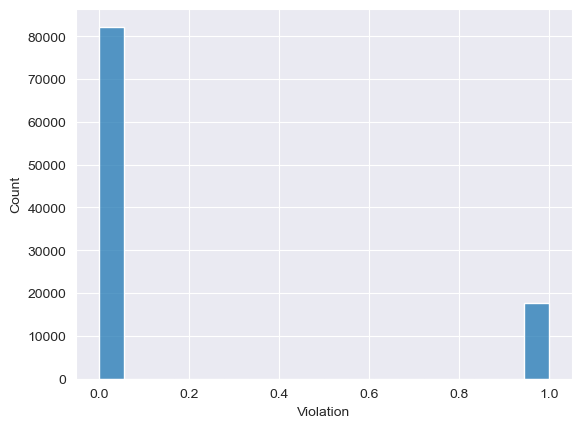

In [29]:
sns.histplot(accidents.Violation)

# Analises dos dados

É conveniente para verificar se uma coluna contém dados ausentes. Também é uma ba ideia conferir os valores mínimo e máximo para ver se há valores discrepantes.

In [30]:
# soma os valores não preenchidos.
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

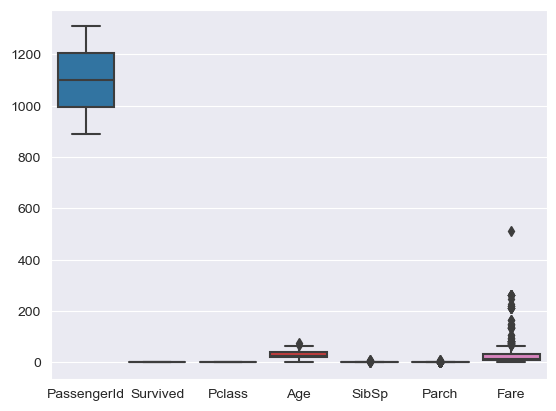

In [31]:
# boxplot
sns.boxplot(titanic)

<AxesSubplot:xlabel='Age', ylabel='Count'>

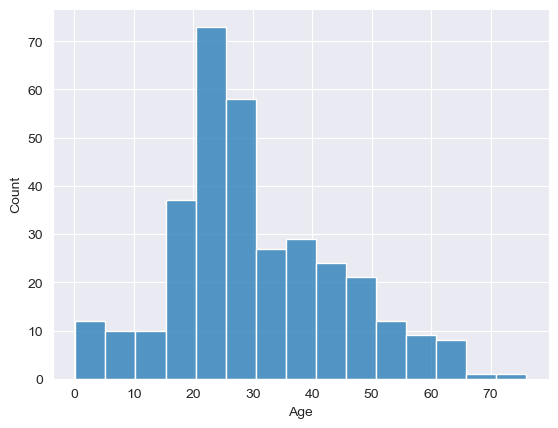

In [32]:
# hist Age
sns.histplot(titanic.Age)

Mesmo havendo um desvio padrão da coluna **Age**, os dados estão sem inconsistência

Com o range de 10 anos até 75

## Imputação de dados

A coluna idade tem valores ausentes. Devemos imputar uma idade a partir dos valores numéricos. Queremos imputar dados apenas no conjunto de treinamento, e então usar esse imputer para preencher os dados no conjunto de testes. Caso contrário, causaremos vazamentos de informações.

In [33]:
y_titanic = titanic.Survived
titanic.drop('Survived', axis=1, inplace=True)
titanic.drop('Name', axis=1, inplace=True)

labelEncoder = LabelEncoder()
labelBinary = LabelBinarizer()

titanic.Sex = labelBinary.fit_transform(titanic.Sex)
titanic.Ticket = labelEncoder.fit_transform(y=titanic.Ticket)
titanic.Cabin = labelEncoder.fit_transform(y=titanic.Cabin)
titanic.Embarked = labelEncoder.fit_transform(y=titanic.Embarked)

X_train, X_test, y_train, y_test = train_test_split(titanic, y_titanic, test_size=0.3, random_state=42)

In [34]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
118,1010,1,1,36.0,0,0,33,75.2417,38,0
271,1163,3,1,NaN,0,0,235,7.7500,76,1
114,1006,1,0,63.0,1,0,303,221.7792,37,2
311,1203,3,1,22.0,0,0,101,7.2250,76,0
131,1023,1,1,53.0,0,0,17,28.5000,34,0


In [35]:
from sklearn import impute
from sklearn.experimental import enable_iterative_imputer

In [36]:
imputer = impute.IterativeImputer()
imputed = imputer.fit_transform(X_train[['Age', 'Cabin']])

In [37]:
X_train.loc[:, ['Age', 'Cabin']] = imputed
imputed = imputer.transform(X_test[['Age', 'Cabin']])
X_test.loc[:, ['Age', 'Cabin']] = imputed

Também é possível fazer a imputação usando as medianas... veja o exemplo:

In [38]:
meds = X_train[['Age', 'Cabin']].mean()

In [39]:
meds

Age      30.384192
Cabin    66.719178
dtype: float64

In [40]:
X_train.Age = X_train.Age.fillna(meds.Age)
X_train.Cabin = X_train.Cabin.fillna(meds.Cabin)
X_test.Age = X_test.Age.fillna(meds.Age)
X_test.Cabin = X_test.Cabin.fillna(meds.Cabin)

# Normalize os dados

Normalizar ou pré-processar os dados ajudarão muitos modelos a terem um melhor desempenho depois, particularmente, para aqueles que dependam de uma métrica de distância para determinar a semelhança.

Vamos padronizar os dados para o pré-processamento. Padronizar significa traduzir os dados de modo que tenham um valor de média igual a zero e um desvio-padrão igual a um.

In [41]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [42]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
118,1010,1,1,36.000000,0,0,33,75.2417,38.0,0
271,1163,3,1,27.735372,0,0,235,7.7500,76.0,1
114,1006,1,0,63.000000,1,0,303,221.7792,37.0,2
311,1203,3,1,22.000000,0,0,101,7.2250,76.0,0
131,1023,1,1,53.000000,0,0,17,28.5000,34.0,0


In [43]:
X_train.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [44]:
X_train.dropna(axis=0, inplace=True)

In [45]:
columns = titanic.columns

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [46]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,-0.826043,-1.472373,0.785281,0.436193,-0.503780,-0.435986,-1.353882,0.599094,-1.471583,-1.587502
1,0.517835,0.875356,0.785281,-0.194124,-0.503780,-0.435986,0.518768,-0.509368,0.477718,-0.432594
2,-0.861177,-1.472373,-1.273429,2.495400,0.574161,-0.435986,1.149165,3.005778,-1.522881,0.722313
3,0.869176,0.875356,0.785281,-0.631544,-0.503780,-0.435986,-0.723485,-0.517990,0.477718,-1.587502
4,-0.711857,-1.472373,0.785281,1.732731,-0.503780,-0.435986,-1.502210,-0.168577,-1.676773,-1.587502


In [47]:
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.957011,0.875356,0.785281,-0.402743,-0.50378,-0.435986,-0.760567,-0.517921,0.169934,-1.587502
1,0.983362,-1.472373,-1.273429,0.664994,-0.50378,-0.435986,-0.964519,2.834287,0.477718,0.722313
2,1.545507,0.875356,0.785281,-0.707810,-0.50378,-0.435986,0.426063,-0.509368,0.477718,-0.432594
3,-1.370621,0.875356,0.785281,0.359926,-0.50378,-0.435986,0.175758,-0.506973,0.477718,0.722313
4,-0.518620,0.875356,-1.273429,0.436193,-0.50378,1.661070,0.324087,-0.436557,0.477718,0.722313
